# Handson 08 - Python

## Ruído AWGN 
O ruido AWGN (Additive White Gaussian Noise) é um modelo de ruido usado para simulações de efeito em muitos processos aleatórios que ocorrem na natureza.

- **Aditive** :  Porque é adicionado a qualquer ruído que possa ser intrínseco ao sinal

- ** White ** : Refere-se à possuir uma potência uniforme em toda a banda de freqüência do sinal

- **Gaussian** : Possui uma distribuição normal

- **Noise **: Ruído.
---
Usa-se a distribuição normal para simular a maioria dos fenomenos naturais, por convergir a um determinado valor. Para gerar um ruído AWGN deve-se seguir as seguintes etapas:

**1)** Conhecida a SNR, mede-se a potência do vetor x(t) pela seguinte equação:
$$ E_{s} = \frac {1} {N} \sum_{0}^{N-1} \left | x(i)  \right |^2 $$
Para L= length(x) Comprimento de x(t)

**2)** Converte uma dada SNR em dB para escala linear, gerando um vetor ruído usando a equação abaixo: 

- Real:
$$Ruído_{real} =  randn(1,L)\cdot \sqrt{\left (\frac{E_{s}}{SNR_{linear}}\right )}$$ 

- Complexo:
$$Ruído_{complexo} =   [randn(1,L)+ j \cdot randn(1,L) ] \cdot \sqrt{\left (\frac{E_{s}}{2 \cdot SNR_{linear}}\right )} $$ 

**3)** Realiza a soma do sinal x(t) com o ruido 

$$ Y(t)= x(t)+ Ruído(t) $$

O script abaixo mostra uma implementação de ruido para um sinal qualquer $x(t)$:

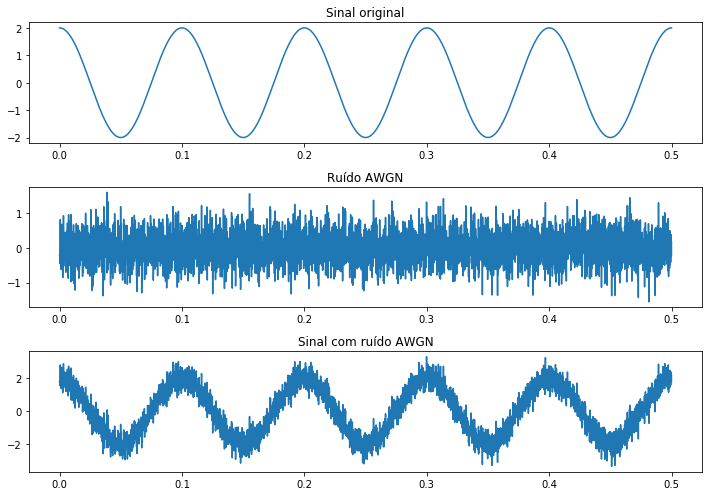

In [7]:
# AWGN_Real.m
## Parâmetros
import numpy as np
SNR_dB= 10                                         # Determina o valor da SNR em dB
t = np.arange(0,0.5,0.0001)                                 # Eixo do tempo
x=2*np.cos(2*np.pi*10*t)                                 # Sinal qualquer x(t)

## Montagem do vetor Ruído Real
L=len(x)                                        # Calcula o comprimento de x
Es= np.sum(np.abs(x)**2)/L                     # Calcula a potência do sinal
SNR= 10**(SNR_dB/10)                                # Calcula a SNR linear
D=Es/SNR                                           # Calcula a densidade espectral do ruído
noiseSigma = np.sqrt(D)                               # Derivação padrao para ruído AWGN real


media=0.0
desvio_padrao=1.0
N_amostras = L
ruido = np.random.normal(media,desvio_padrao,N_amostras) #ruido gaussiano da numpy.random
n = noiseSigma*ruido                         # Ruido real calculado 
y =x+n                                             # Sinal Ruidoso

## Plotting

import matplotlib.pyplot as plt

plt.figure(1,[10,7])

plt.subplot(311)
plt.title("Sinal original")
plt.plot(t,x)

plt.subplot(312)
plt.title("Ruído AWGN")
plt.plot(t,n)


plt.subplot(313)
plt.title("Sinal com ruído AWGN")
plt.plot(t,y)

plt.tight_layout()
plt.show()

Simularemos também para um sinal complexo, gerando também um ruído complexo segundo a equação dada acima:

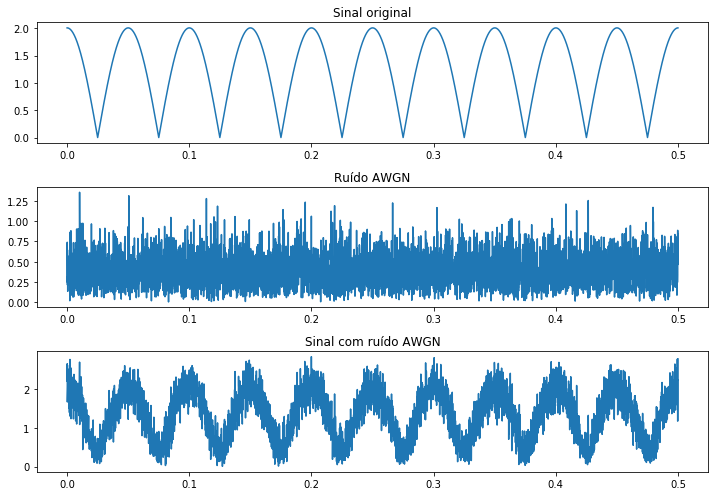

In [11]:
## Parâmetros
import numpy as np
SNR_dB= 10                                         # Determina o valor da SNR em dB
t = np.arange(0,0.5,0.0001)                                 # Eixo do tempo
x=2*np.cos(2*np.pi*10*t)  + 1j*0.2*np.cos(2*np.pi*10*t)    # Sinal qualquer x(t)

## Montagem do vetor Ruído complexo
L=len(x)                                        # Calcula o comprimento de x
Es= np.sum(np.abs(x)**2)/L                     # Calcula a potência do sinal
SNR= 10**(SNR_dB/10)                                # Calcula a SNR linear
D=Es/SNR                                           # Calcula a densidade espectral do ruído
noiseSigma = np.sqrt(D/2)                 # Derivação padrao para ruído AWGN real


media=0.0
desvio_padrao=1.0
N_amostras = L
ruido_r = np.random.normal(media,desvio_padrao,N_amostras) #ruido gaussiano da numpy.random
ruido_i = np.random.normal(media,desvio_padrao,N_amostras) #recalculado
n = noiseSigma*(ruido_r+1j*ruido_i)                         # Ruido real calculado 
y =x+n                                             # Sinal Ruidoso
## Plotting

import matplotlib.pyplot as plt

plt.figure(1,[10,7])

plt.subplot(311)
plt.title("Sinal original")
plt.plot(t,np.abs(x))

plt.subplot(312)
plt.title("Ruído AWGN")
plt.plot(t,np.abs(n))


plt.subplot(313)
plt.title("Sinal com ruído AWGN")
plt.plot(t,np.abs(y))

plt.tight_layout()
plt.show()

------
**Desafio:** Estimar a SNR (dB) de um sinal $x=cos(2 \pi f_{m} t)$ real e um complexo do arquivo DesafioR_08.mat  e DesafioC_08.mat, respectivamente a partir do sinal recebido $y(t)$, da amplitude do sinal $A_{m}$ e sua frequência 
$f_{m}$.

**Obs:**O sinal complexo é dado como a soma de dois cossenos de amplitudes diferentes, sendo um complexo e outro real.

**Dica:** Lembre-se que é possível ler arquivos .mat em Python. Basta usar:
```python
from scipy.io import loadmat
variaveis = loadmat('endereco/arquivo.mat')
``` 
O retorno da loadmat é um [dicionário](http://excript.com/python/funcoes-dicionarios.html), e cada valor é acessado pelo seu nome (_key_) associado, exemplo:

```python
m_t = variaveis['m_t']
T = variaveis['T']

```

**a) Cálculo do valor da SNR.**

**b) Justificar o porquê de ao colocar um ruído de snr = 10, na medição é comum ter valores de snr próximos ao original.**

### GABARITO PENDENTE